OLS 회귀분석 (statsmodels)
전처리한 자료에 회귀분석을 적용해 변수별 회귀계수를 구할 수 있다.

python에서 다양한 통계 분석을 할 수 있도록 기능을 제공

다중회귀 공식
yi=β0+β1x1+β2x2⋯βnxn+

### 단순회귀
- 연속형 종속변수와 독립변수 간 선형관계 및 설명을 확인 하는 기법
- 종속변수와 독립변수가 각각 하나인 경우 단순 선형 회귀 모형 
- 오차 평가 지표로 모델의 성능을 평가. 
- statsmodels- ols(formula, data, subset=None, drop_cols=None, *args, **kwargs)  = (파이썬 통계 모델)
    - 종속변수, 독립변수 , fit()모델실행, predict()예측, 변수명에 오점 또는 특수문자 오류발생
- sklearn  - LinearRegression() 
    - fit_intercept 로 절편의 적합 유무를 설정 , 
    - 모델의 객체로 coef_, intercept_ 속성으로 계수, 절편이 확인 가능하다. 
    - fit()모델실행, predict()예측
    - MAE  : mean_absolute_error()
    - MSE   :mean_squared_error()
    - RMSE

###  다중 회귀
- 연속형 종속변수와 두개 이상의 독립변수 간 선형관계 및 설명을 확인 하는 기법
- 필요 시 모델 성능향상을 위해서 파생변수 생성 및 성능 비교
- 명목형 변수가 독립변수인 경우는 가변수 변환 후 모델 구현 
- 다중 공선성 문제 
    - 독립변수간에 강한 상관관계가 발생되는 문제 
    - 상관관계를 확인해서 그 중 값이 높은것을 사전에 제거 
    - 회귀모델 생성하게 되면 분산에 대한 팽창계수("VIF") 확인 (10이상) 관련된 변수 처리 
    - from patsy import dmatrices : 수식기반 데이터 행렬을 생성 / 분산 팽창 계수를 확인하기 위한 전처리 함수 
    - variance_inflation_factor : VIF 연산을 쉽게 하기 위한 함수, list를 사용해서 값을 추출 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets  import load_iris
from sklearn.model_selection import train_test_split

### Q1) 아이리스 데이터 KNN 실습  
    
    - 이웃의 개수 (K)를 하이퍼 파라미터로 지정 , 몇개의 이웃을 지정하느냐에 따라서 모델의 성능이 달라진다.
    
    - K가 작을 경우 데이터의 지역적 특성을 지나치게 반영하여 과적합이 발생한다. 
    
    - 반대로 K가 클 경우 모델이 지나치게 정규화 되어 과소적합이 발생할 수 있다. 
    
    - 만약에 학습 데이터 전체 개수를 K로 할 경우 -> 어떤 새로운 데이터가 입력되더라도 모든 같은 이웃을 가지게 된다
      -> 모든 테스트 데이터에 대해서 같은 예측을 하게된다.  
      
    -  K를 작게 사용하면 모델의 복잡도가 높아지고 많이 사용하면 모델의 복잡도가 낮아진다.  [중요!!]   
    

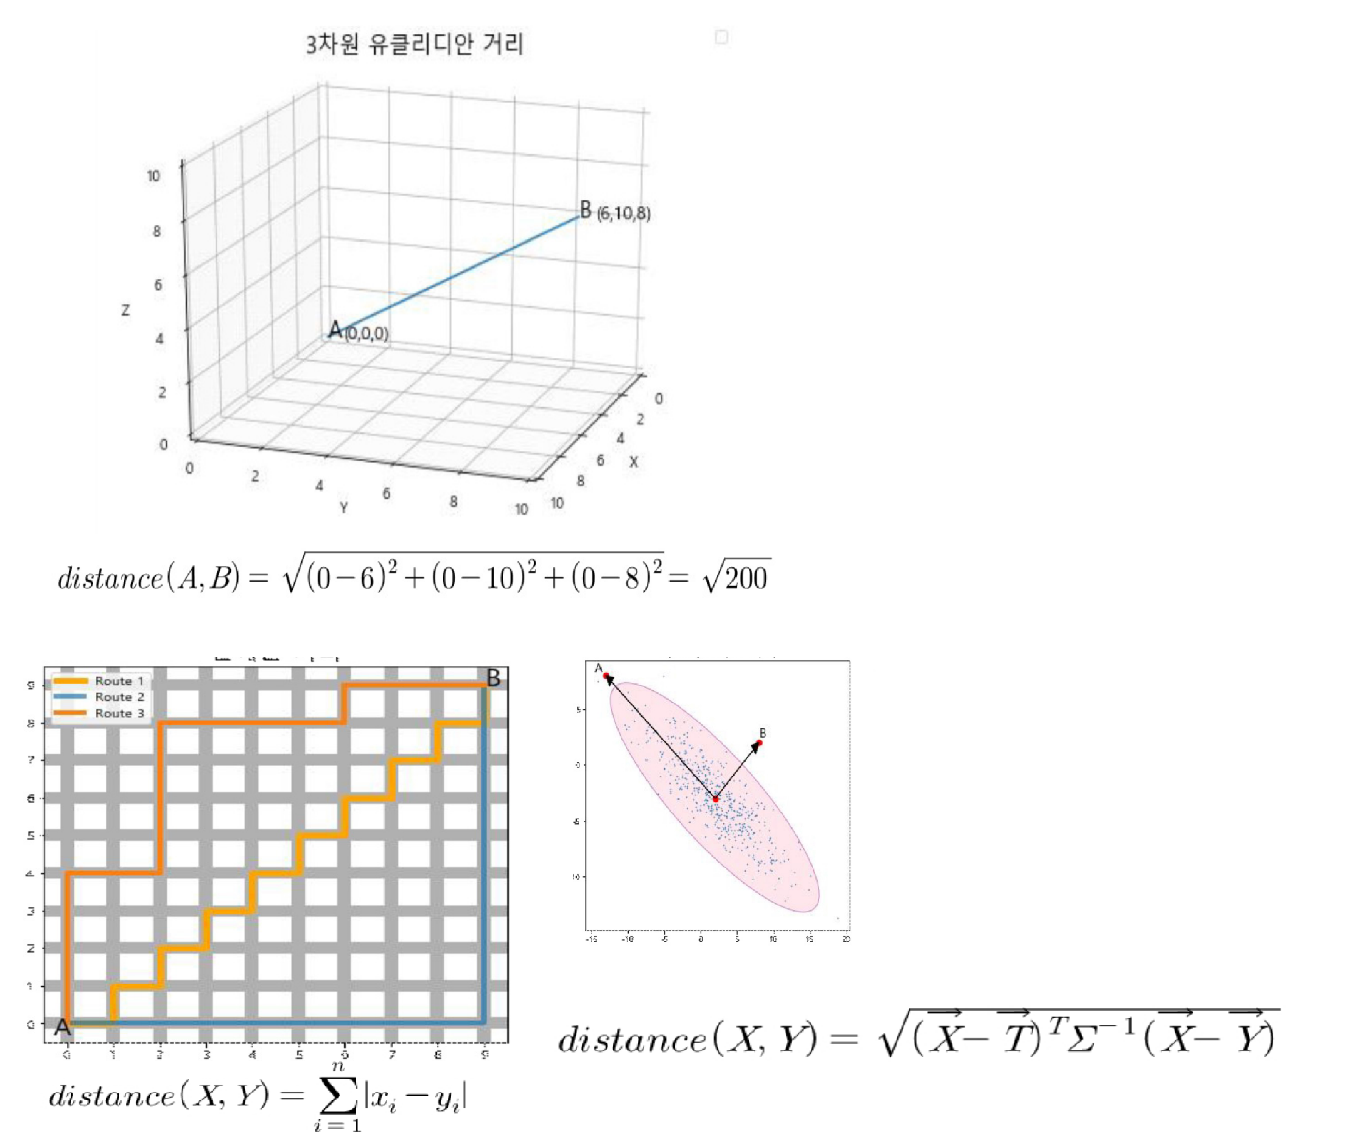

In [26]:
from IPython.display import Image

Image('./img/거리구하기.png')

In [5]:
#1) 연습용 데이터 로드   _ 아이스리 데이터 KNN 실습  

dataset  = load_iris()
data  = pd.DataFrame(dataset.data, columns = dataset.feature_names)

X_train,X_test, y_train, y_test  =  \
       train_test_split(data, dataset.target, random_state = 42)

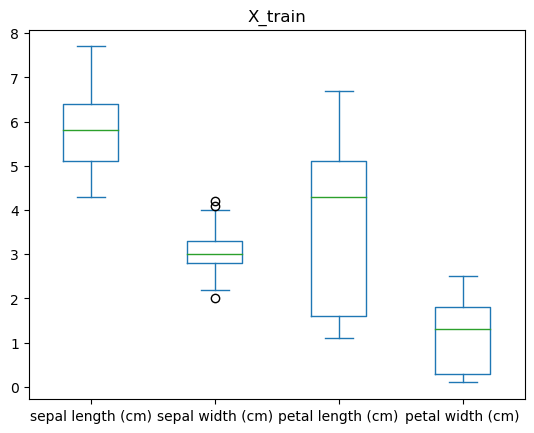

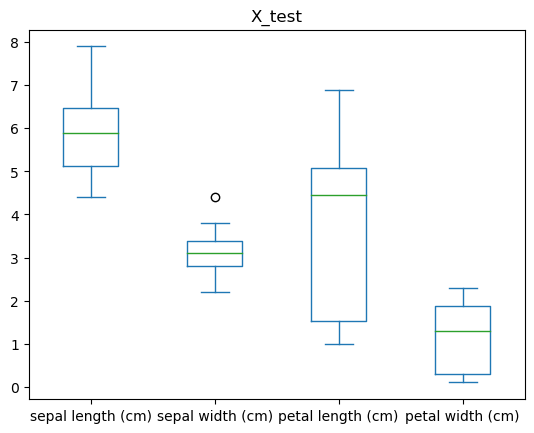

In [6]:
#2) 전처리   : 시각화 박스플롯을 그려보자  -> 피처마다 스케일이 다른 것을 확인  -> 정규화  
X_train.plot(kind = 'box');
plt.title ('X_train')
plt.show();
X_test.plot(kind ='box');
plt.title('X_test')
plt.show();

In [7]:
#3) 정규화  ->MinMaxScaler 값의 범위의 영향을 받지 않도록 전처리 -> pandas' DataFrame 타입도 지원한다.  
from sklearn.preprocessing import MinMaxScaler
mms =  MinMaxScaler()
X_train_scaled  =  mms.fit_transform(X_train)
X_test_scaled   =  mms.fit_transform(X_test)

In [8]:
#4)모델 생성 및 학습  KNeighborsClassifier  
# 모델을 인스턴스화 한후 스케일링한 데이터로 학습시킨다.  

model  =  KNeighborsClassifier(n_neighbors  = 5)  #이웃의 개수를 정의  , 거리측정 = metric 
model.fit(X_train_scaled ,y_train)


KNeighborsClassifier()

In [9]:
#print(help(KNeighborsClassifier ))

In [10]:
#5) 모델 예측 및 평가  : 스케일링한 테스트 셋으로 예측하고 KNN 모델의 정확도를 평가 
#Tip : 스케일링한 학습 데이터로 학습한 모델로 예측할 때는 , 예측할 데이터도 동일한 스케일링을 적용해야 한다. 
from sklearn.metrics import accuracy_score
pred  = model.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.974

#번외편 
 - kNN 알고리즘 학습하기전에는 변수의 범위를 축소해야 한다.  
 - 변수마다 측정범위가 다를 경우에 범위가 큰 변수가 모델에 과하게 큰영향을 미치고 , 범위가 작은 변수는 무시될 수 있다.  (직원 수는 빠지고 계산한다)

### Q2)LinearSVC로 분류를 해보자 (선형 SVC)
    - start -> 데이터 50 이상  -> 카테고리데이터 -> 라벨있는 데이터  -> 데이터 수가 10만이하  
    - 커널을 사용하지 않는 SVM(지원 벡터 머신)을 기반으로 하는 클래스 분류 기법

(100, 2)
(100,)


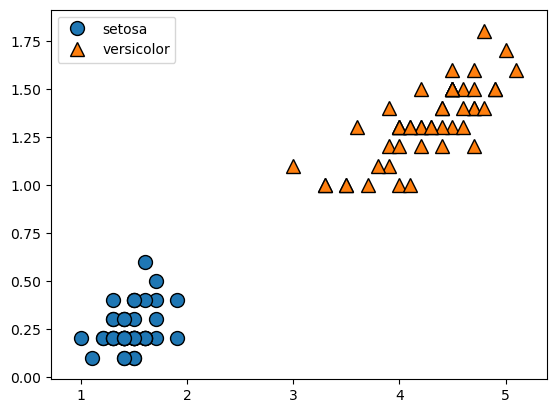

In [11]:
#1)  분류 형태를 확인  : 튜토리얼 코드 변형
import  matplotlib.pyplot  as  plt 
from  sklearn.model_selection  import  train_test_split 
from  sklearn.svm  import  LinearSVC 
from  sklearn.datasets  import  load_iris 
import  mglearn     ##!pip install mglearn -> 결정경계, 분류, 클러스터링 결과를 예쁘게 보여줌, 특성 중요도 시각화에 특출, 
# 라벨러를 맵플라맵이랑 해서 같이 시각화를 보여주는 데 경계면이나 경계선을 기점으로 시각화를 할 수 있게끔 도와주는 애
iris  =  load_iris () 
X  =  iris . data [: 100 ,  2 :] 
Y  =  iris . target [: 100 ] 
print ( X . shape ) 
print ( Y . shape )
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.legend(['setosa', 'versicolor'], loc='best')
plt.show();

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


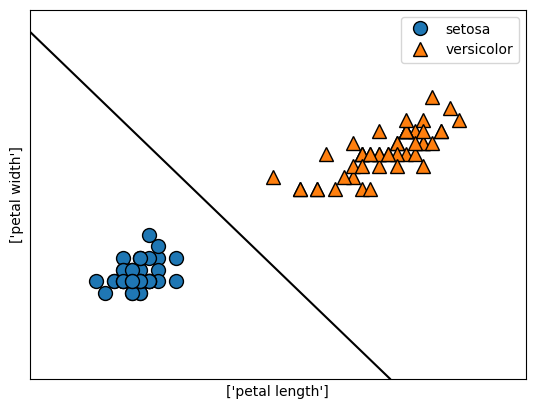

In [12]:
#2)  LinearSVC 를 이용해서 모형 구축  
X_train, X_test, y_train, y_test = train_test_split(X,Y, stratify= Y , random_state =0) # 홀드아웃

svm  = LinearSVC()
svm.fit(X_train, y_train) # 분류작업이 끝남

mglearn.plots.plot_2d_separator(svm,X) # 해당 모형의 X값을 기준으로 선을 그어라
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y) # 데이터를 스케터로 그려라.

plt.xlabel(['petal length'])
plt.ylabel(['petal width'])
plt.legend(['setosa', 'versicolor'], loc='best')
plt.show();

(100, 2)
(100,)


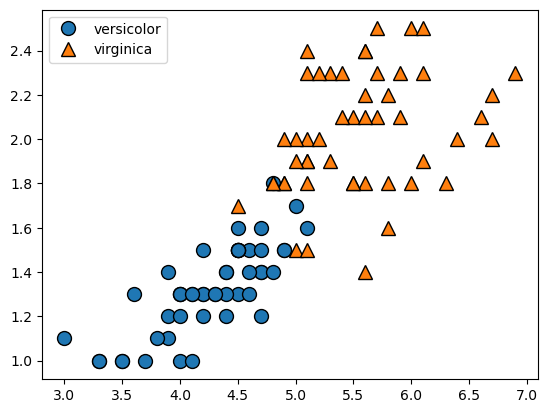

In [13]:
#3)데이터 겹침을 확인 해보자.  -> 선형모형을 이용한 SVC 모형 구축  
#versicolor, virginica 
iris  =  load_iris () 
X  =  iris . data [50:  ,  2 :] 
Y  =  iris . target [50:  ] -1
print ( X . shape ) 
print ( Y . shape )
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)
plt.legend([ 'versicolor','virginica'], loc='best')
plt.show(); # 겹친다.

### Q3) SVC 모델 사용 

(100, 2)
(100,)
[1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1]
0.96


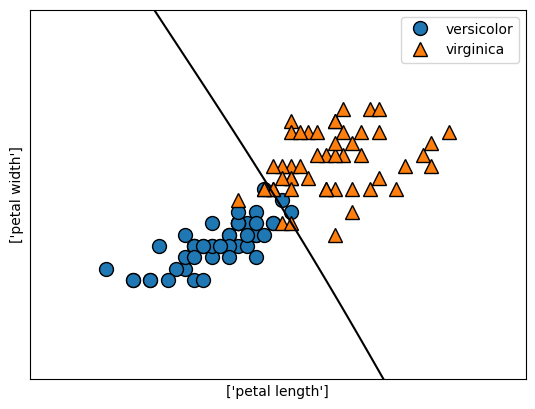

In [14]:
#4)SVC모델 적용
from sklearn.svm  import SVC

iris  =  load_iris () 
X  =  iris . data [50:  ,  2 :] 
Y  =  iris . target [50:  ] -1
print ( X . shape ) 
print ( Y . shape )

X_train, X_test, y_train, y_test = train_test_split(X,Y, stratify= Y , random_state =0)

svm  = SVC() # 파라미터 하나도 없다.
svm.fit(X_train, y_train)

pred = svm.predict(X_test)
print(pred)

res=accuracy_score(pred, y_test)
print(res)

mglearn.plots.plot_2d_separator(svm,X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)

plt.xlabel(['petal length'])
plt.ylabel(['petal width'])
plt.legend(['versicolor','virginica'], loc='best')
plt.show(); # 잘리는 애들이 있다.

(100, 2)
(100,)
[1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1]
1.0


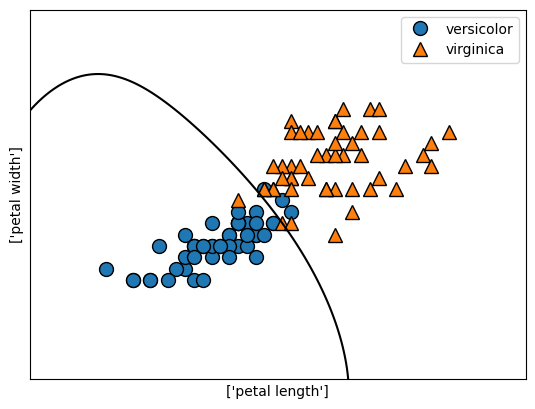

In [15]:
#5)SVC모델 적용 _하이퍼 파라미터 지정  
from sklearn.svm  import SVC

iris  =  load_iris () 
X  =  iris . data [50:  ,  2 :] 
Y  =  iris . target [50:  ] -1
print ( X . shape ) 
print ( Y . shape )

X_train, X_test, y_train, y_test = train_test_split(X,Y, stratify= Y , random_state=0  )

# 겹침이 많은 애를 경계를 최소한 줄여서 경계를 주고 분류를 하기 위한 목적이 있다. 뭐로 파라미터로 
svm  = SVC(kernel='rbf',  gamma = 1/2 , C=1.0 , class_weight= 'balanced', random_state=0 )
svm.fit(X_train, y_train)

pred = svm.predict(X_test) 
print(pred)

res=accuracy_score(pred, y_test)
print(res)

mglearn.plots.plot_2d_separator(svm,X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], Y)

plt.xlabel(['petal length'])
plt.ylabel(['petal width'])
plt.legend(['versicolor','virginica'], loc='best')
plt.show();

In [16]:
#print(help(SVC))

### Q4) SVM

### Q5) SVR을 이용해서 클래스의 회귀값을 확인  / 커널을 확인 하자  

In [17]:
#1)logspace()를 사용해보자
import numpy as np   
res  = np.logspace(1,10,10, base =2) #지수함수 , 등비수열 배열을 사용
print(res)

[   2.    4.    8.   16.   32.   64.  128.  256.  512. 1024.]


In [18]:
#2) linspace()  를 사용해보자  2의 n승 값 연습
a = np.linspace(1,10,10) 
base  =2
res  = base**a
print(res)

[   2.    4.    8.   16.   32.   64.  128.  256.  512. 1024.]


In [19]:
from sklearn import preprocessing, linear_model,svm

###### 노이즈가 없는 데이터와 노이즈가 있는 데이터를 생성한 회귀 문제 샘플링

#3) 샘플 데이터 생성  
numSample =80  # 데이터 포인터 80개 생성하겠다.
x=np.sort(5*np.random.rand(numSample, 1) , axis =0)  # 1차원 배열로 난수 배열로 균일분포를 만들겠다. 오름차순

y = np.sin(x).ravel()  # X값을 사인함수 계산하고 사인 곡선 데이터 생성, ravel : 데이터 생성 후 1차원 배열로 평탄화

# np.random.randn() -> 표준 평균 분포 (평균 0, 표준편차 1)을 구현하는 난수를 생성
y  = y  +  0.2 * (np.random.randn(numSample))  # 난수들을 0.2배로 + y -> 사인 곡선에 노이즈 추가한다.

x_true  = np.arange(0,5.0,0.1) # 노이즈가 없는 정확한 사인 곡선
y_true  = np.sin(x_true).ravel() # 노이즈가 없는 사인 곡선의 y값
print(x_true)
print(y_true)
print(x)
print(y)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]
[ 0.     0.1    0.199  0.296  0.389  0.479  0.565  0.644  0.717  0.783
  0.841  0.891  0.932  0.964  0.985  0.997  1.     0.992  0.974  0.946
  0.909  0.863  0.808  0.746  0.675  0.598  0.516  0.427  0.335  0.239
  0.141  0.042 -0.058 -0.158 -0.256 -0.351 -0.443 -0.53  -0.612 -0.688
 -0.757 -0.818 -0.872 -0.916 -0.952 -0.978 -0.994 -1.    -0.996 -0.982]
[[0.015]
 [0.016]
 [0.035]
 [0.072]
 [0.094]
 [0.141]
 [0.195]
 [0.222]
 [0.226]
 [0.322]
 [0.397]
 [0.437]
 [0.576]
 [0.582]
 [0.681]
 [0.697]
 [0.954]
 [0.966]
 [1.011]
 [1.08 ]
 [1.084]
 [1.123]
 [1.166]
 [1.187]
 [1.222]
 [1.415]
 [1.516]
 [1.589]
 [1.602]
 [1.605]
 [1.805]
 [1.833]
 [1.833]
 [1.833]
 [1.846]
 [1.952]
 [2.037]
 [2.075]
 [2.081]
 [2.095]
 [2.143]
 [2.171]
 [2.214]
 [2.222]
 [2.313]
 [2.403]
 [2.7  ]
 [2.837]
 [2.851]

In [24]:
#4) SVR 로 데이터를 회귀성으로 분류를 하자, 오차율도 적용해보자. 
from sklearn.model_selection import GridSearchCV  # 최적의 하이퍼 파리미터 찾기  
sm  = svm.SVR()

#현재 모델이 가진 하이퍼 파라미터 키값을 리턴 해보자. -> 생성자의 매개인자를 키값으로 리턴  
print(sm.get_params().keys())
print(sm.get_params())

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])
{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [25]:
#최적의 파라미터를 찾자.  
kernel_list  = ['linear','poly','rbf','sigmoid']
C_list  =[1,2]
param ={'kernel' : kernel_list, 'C':C_list }
clf_svr = GridSearchCV(sm, param, cv = 5) 
clf_svr.fit(x,y)
y_res =clf_svr.fit(x,y).predict(x)
y_res

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 2],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

array([-0.069, -0.067, -0.051, -0.019,  0.001,  0.044,  0.094,  0.12 ,
        0.125,  0.217,  0.291,  0.33 ,  0.465,  0.471,  0.563,  0.578,
        0.788,  0.797,  0.827,  0.87 ,  0.873,  0.895,  0.918,  0.928,
        0.944,  1.006,  1.02 ,  1.023,  1.023,  1.023,  0.992,  0.984,
        0.984,  0.984,  0.98 ,  0.939,  0.899,  0.878,  0.874,  0.866,
        0.837,  0.82 ,  0.791,  0.786,  0.719,  0.647,  0.38 ,  0.245,
        0.231,  0.221,  0.177,  0.156,  0.013, -0.018, -0.113, -0.166,
       -0.171, -0.273, -0.298, -0.37 , -0.389, -0.467, -0.572, -0.574,
       -0.834, -0.841, -0.875, -0.883, -0.896, -0.898, -0.907, -0.908,
       -0.908, -0.91 , -0.91 , -0.91 , -0.906, -0.9  , -0.898, -0.891])

In [22]:
#최적의 파람값 확인  
print('최적의 파람값 : ' ,clf_svr.best_params_)
print('점수  :' , clf_svr.best_score_)

최적의 파람값 :  {'C': 1, 'kernel': 'rbf'}
점수  : -7.061316677899365


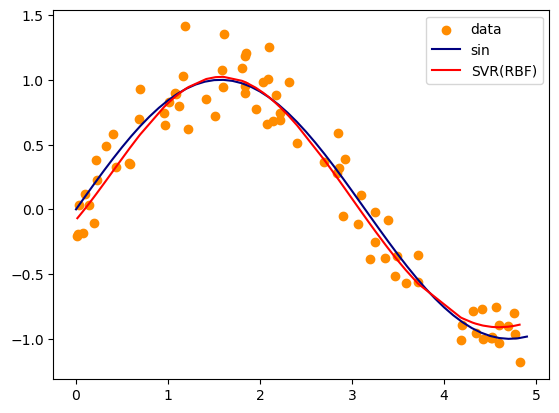

In [23]:
# 시각화로 결과 확인 해보자
plt.scatter(x,y, color ='darkorange', label= 'data'); 
plt.plot( x_true, y_true, color ='navy' , label ='sin'); # 노이즈 없는 데이터
plt.plot(x,y_res, color ='red', label ='SVR(RBF)'); # 노이즈 있는 데이터 
plt.legend();
plt.show();

<< 각 커널 함수를 사용하는 서포트 벡터 머신 (SVM)의 결정 경계를 시각화 >>  
https://docs.opencv.org/4.x/d4/db1/tutorial_py_svm_basics.html  
<img src="./img/SVM.png">
<img src="./img/SVM마진.png">

최대마진: 가장 넓은 공간을 찾는다. 종류 hard마진(선 위에 걸쳐지는 애들은 분류에 포함X), soft마진(일부 마진 오류 허용O) = 하이퍼파라미터 C  
서포트 벡터: 결정경계에 가장 가까이 위치한 데이터 포인터 - 녹샌선에 가장 가까운 데이터들 빨강 2개 파랑 2개  
결정경계, 초평면, 최대마진 다 같은 말  
서포트 벡터가 결정 경계를 구분짓는 결정적 요소  

이 데이터셋을 가져다가 선형함수 + 커널함수 = 비선형 데이터셋  
커널함수의 종류가 이 모듈 사용 시 가장 핵심  
https://scikit-learn.org/stable/modules/svm.html#kernel-functions  
linear 선형 커널 : 선형 결정 경계  
polynomial 다항식 커널 : degree: 차수 결정, coef0: 항을 조절 = 복잡한 결정 결계 형성  
rbf: gamma 파라미터, 0보다 커야함 (가우시안 분포) = 곡률 조정  
sigmoid : r, coef0,  딥러닝의 비용함수, 선형과 비선형의 경계를 생성  

<Figure size 1200x900 with 0 Axes>

SVC(kernel='linear')

Text(0.5, 1.0, 'SVM with linear kernel')

SVC(kernel='poly')

Text(0.5, 1.0, 'SVM with poly kernel')

SVC()

Text(0.5, 1.0, 'SVM with rbf kernel')

SVC(kernel='sigmoid')

Text(0.5, 1.0, 'SVM with sigmoid kernel')

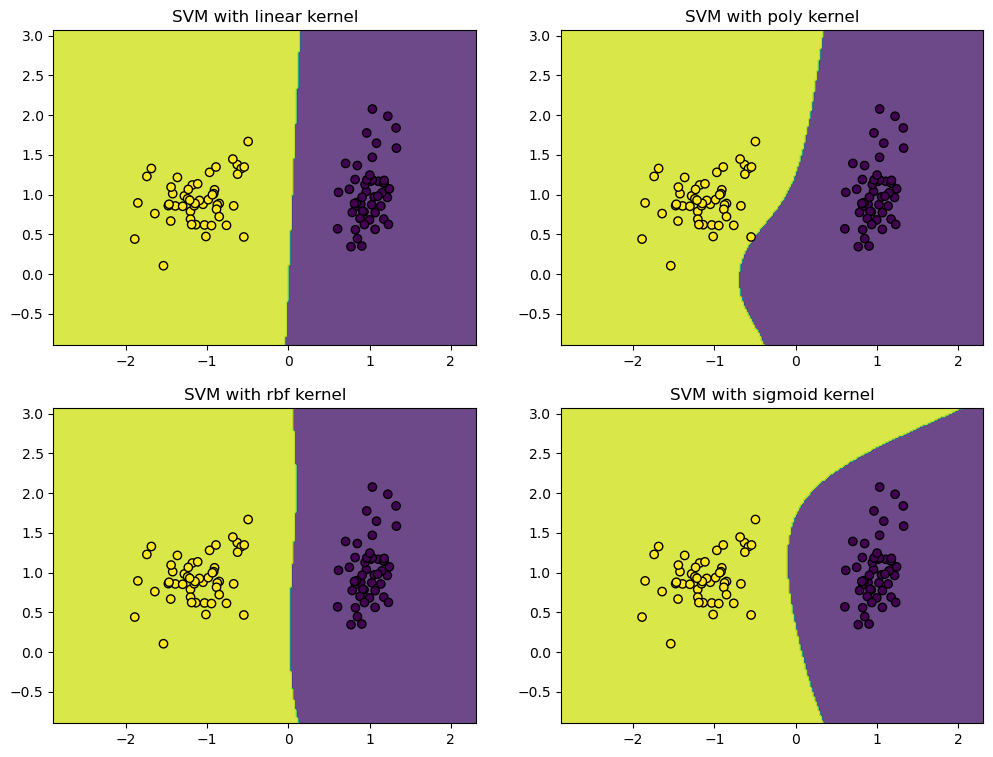

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


X, y = datasets.make_classification(n_features=2, n_redundant=0, n_informative=2,
                                    random_state=1, n_clusters_per_class=1)

# SVM 모델을 각각의 커널로 학습
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = [svm.SVC(kernel=k, C=1.0) for k in kernels]

# 시각화 설정
plt.figure(figsize=(12, 9))
X0, X1 = X[:, 0], X[:, 1]
xx, yy = np.meshgrid(np.arange(X0.min() - 1, X0.max() + 1, 0.02),
                     np.arange(X1.min() - 1, X1.max() + 1, 0.02))

# 각 커널에 대해 모델 학습 및 시각화
for i, model in enumerate(models):
    ax = plt.subplot(2, 2, i + 1)
    model.fit(X, y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8)
    ax.scatter(X0, X1, c=y, edgecolors='k')
    ax.set_title(f'SVM with {kernels[i]} kernel')

선형 : 가장 편안  
다항식: 비선형 관계 모델링  
rbf : 가우시안 분포, 감마때문에 구불구불하게 만들어짐, 감마 크면 좁고 구불구불  
시그모 : 선형과 비선형의 결정경계  

=> 다항식이랑 rbf 가장 선호  
https://scikit-learn.org/stable/modules/svm.html#classification  


https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py  
결정경계와 서포트 벡터 머신 알고리즘 시각화

SVC(C=1000, kernel='linear')

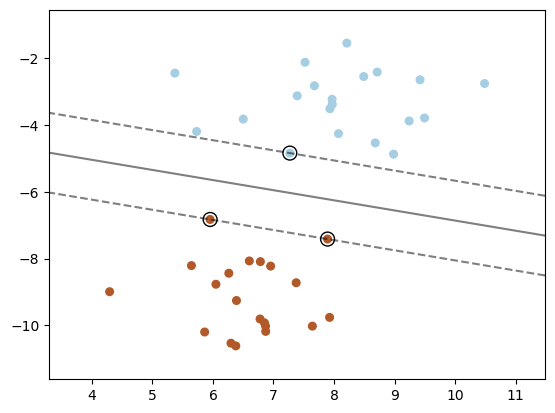

In [28]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs # 데이터셋 생성
from sklearn.inspection import DecisionBoundaryDisplay  # 결정경계 시각화 하는 데 사용

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6) # 40개의 샘플을 2개의 중심점 주변에 배치

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000) # C : 정규화 강도 역수 , 값이 클수록 정규화 강도 적게 적용된다.
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired) # c = y : 데이터 포인트 색상을 클래스마다 다르게 지정하겠다.

# plot the decision function
# 결정경계 시각화 하겠다.
# 설정값
ax = plt.gca()  # 큰 서포트 벡터를 큰원으로 그려가지고 결정경계 가까이 보여주겠다. 동그라미
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"], # 중심선 실선, 마진선 점선
    ax=ax,
)

# plot support vectors
# 실제 그려주는 애
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-unbalanced-py

SVC(kernel='linear')

SVC(class_weight={1: 10}, kernel='linear')

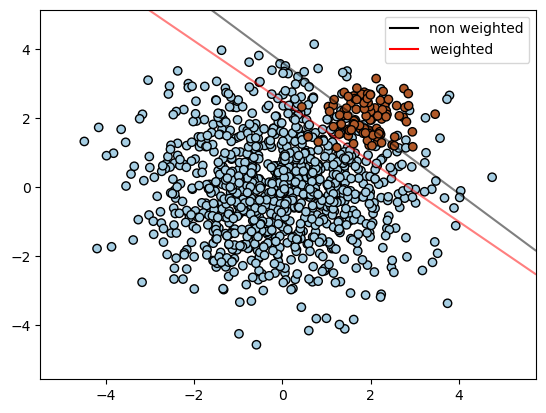

In [29]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# we create two clusters of random points
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=0,
    shuffle=False,
)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel="linear", class_weight={1: 10})
wclf.fit(X, y)

# plot the samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")

# plot the decision functions for both classifiers
ax = plt.gca()
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

# plot decision boundary and margins for weighted classes
wdisp = DecisionBoundaryDisplay.from_estimator(
    wclf,
    X,
    plot_method="contour",
    colors="r",
    levels=[0],
    alpha=0.5,
    linestyles=["-"],
    ax=ax,
)

plt.legend(
    [
        mlines.Line2D([], [], color="k", label="non weighted"),
        mlines.Line2D([], [], color="r", label="weighted"),
    ],
    ["non weighted", "weighted"],
    loc="upper right",
)
plt.show()

https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_separating_hyperplane.html#sphx-glr-auto-examples-linear-model-plot-sgd-separating-hyperplane-py

SGDClassifier(alpha=0.01, max_iter=200)

(-1.000, 5.000, -1.000, 5.798)

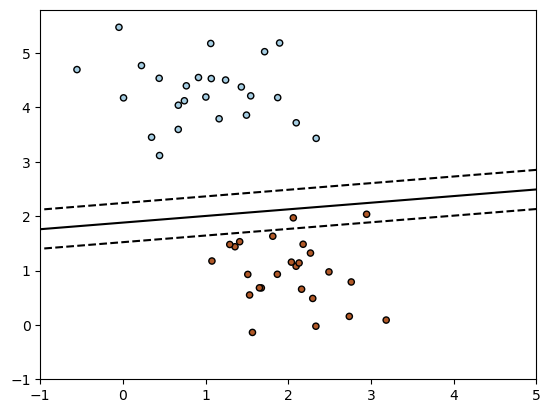

In [30]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.linear_model import SGDClassifier  # 리니어모델로 분류 작업

# we create 50 separable points
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200)

clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ["dashed", "solid", "dashed"]
colors = "k"
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolor="black", s=20)

plt.axis("tight")
plt.show()

https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html#sphx-glr-auto-examples-svm-plot-svm-margin-py

SVC(C=1, kernel='linear')

<Figure size 400x300 with 0 Axes>

C:\Users\User\AppData\Local\Temp\ipykernel_19656\1106847024.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


(-5.500, 5.500, -8.991, 9.715)

(-4.800, 4.200)

(-6.000, 6.000)

([], [])

([], [])

SVC(C=0.05, kernel='linear')

<Figure size 400x300 with 0 Axes>

C:\Users\User\AppData\Local\Temp\ipykernel_19656\1106847024.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


(-5.500, 5.500, -9.193, 9.240)

(-4.800, 4.200)

(-6.000, 6.000)

([], [])

([], [])

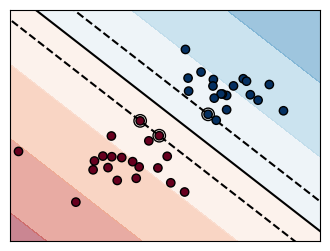

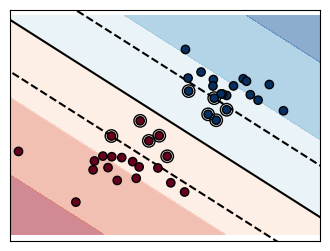

In [31]:
#### C 매개변수에 따라 SVM의 결정경계가 어떻게 달라지는 지 보여주고 있다.

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

### SVM 사용해서 선형 분류 문제를 해결하고, 서로 다른 정규화 강도 (c)에 따른 결정경계와 마진을 최적화 한다.

import matplotlib.pyplot as plt
import numpy as np

from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# ====================== 여기까지는 앞이랑 동일

# figure number
fignum = 1

# fit the model
for name, penalty in (("unreg", 1), ("reg", 0.05)):
    clf = svm.SVC(kernel="linear", C=penalty)  # c=1, 0.05, C가 크면 정규화 적게 적용되고, 작으면 많이 적용된다.  ★★★★★★★★
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_**2))
    yy_down = yy - np.sqrt(1 + a**2) * margin
    yy_up = yy + np.sqrt(1 + a**2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, "k-")  # 실선 = 결정경계 ★★★★★★★★
    plt.plot(xx, yy_down, "k--") # 점선 = 마진경계  ★★★★★★★★
    plt.plot(xx, yy_up, "k--")

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
        cmap=plt.get_cmap("RdBu"),
    )
    plt.scatter(
        X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.get_cmap("RdBu"), edgecolors="k"
    )

    plt.axis("tight")
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Put the result into a contour plot
    plt.contourf(XX, YY, Z, cmap=plt.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()
# 위는 C값 높은 거 , 아래는 C값 낮은 거 ★★★★★★★★

In [33]:
### 1. 데이터 로드 및 분할
dataset = load_iris()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

X_train, X_test, y_train, y_test = \
    train_test_split(data, dataset.target, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler

### 2. 데이터 표준화
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 3. 모델 설정
svm_model = SVC()

### 4. 하이퍼파라미터 그리드 설정 C, gamma, kernel
param_grid={
    'C' : [0.1,1,10,100],
    'gamma': [1,0.1,0.01,0.001],  # 감마는 kernel 함수에 영향을 준다. 
    'kernel': ['rbf','poly','sigmoid']
}
# 감마는 커널 함수의 "폭" 조절 -> 과소적합, 과대적합이 발생하므로 교차검증 최적화 반드시 해야한다.

### 5. GridSearchCV 설정
grid_search=GridSearchCV(svm_model,param_grid, cv=5)

### 6. 수행
grid_search.fit(X_train,y_train)

### 7. 결과 출력
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

best_parameters, best_score

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

({'C': 100, 'gamma': 0.100, 'kernel': 'rbf'}, 0.955)

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC  
class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)  
-  kernel='rbf' 기본값 결정경계에 있는 곡률 조절 -> 샘플을 넓게 퍼트려서 경계를 부드럽게 or 좁게 만들어서 경계를 더 많이 한다던지 -> gamma 필요

In [36]:
#### 실행
from sklearn.metrics import accuracy_score

optimal_svm = SVC(C=100, gamma=0.100, kernel='rbf')
optimal_svm.fit(X_train, y_train)

y_pred = optimal_svm.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

new_data = np.array([[5.1, 3.5, 1.4, 0.2]])

new_data_scaled = scaler.transform(new_data)

new_prediction = optimal_svm.predict(new_data_scaled)
print(new_prediction)
print(iris.target_names[new_prediction])

# decision_function을 통해 값을 리턴 받아 보자.
# X_test의 결정 함수 값을 계산 / 각 클래스에 속한 모델의 신뢰도를 확률값으로 리턴 : 
# 부호 분류가 2개면 , 양의 값 : 양성클래스, 음의 값 : 음성클래스
# 다중클래스는 각 0, 1, 2에 있을 때 각 신뢰도 점수를 반환
# 어디? 이 테스트 샘플이 어느 클래스에 속하는 지 리턴  ex) [-0.234,  2.265,  0.799] 각 클래스에 속할 확률
# 즉, 얘가 SVM이니까 결정경계로 부터 데이터를 가져다가 줬을 때 거리값이 샘플의 어느 클래스에 속할 지 확률을 리턴
decision_function_res = optimal_svm.decision_function(X_test)
decision_function_res

SVC(C=100, gamma=0.1)

1.0
[0]
['setosa']


C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.234,  2.265,  0.799],
       [ 2.223,  1.279, -0.293],
       [-0.203,  0.735,  2.282],
       [-0.237,  2.25 ,  0.884],
       [-0.232,  2.25 ,  0.86 ],
       [ 2.227,  1.279, -0.293],
       [-0.208,  2.275,  0.75 ],
       [-0.231,  0.848,  2.252],
       [-0.242,  2.217,  1.145],
       [-0.224,  2.274,  0.761],
       [-0.233,  1.145,  2.204],
       [ 2.241,  1.258, -0.286],
       [ 2.235,  1.275, -0.292],
       [ 2.24 ,  1.263, -0.288],
       [ 2.234,  1.268, -0.289],
       [-0.219,  2.263,  0.785],
       [-0.241,  0.762,  2.279],
       [-0.224,  2.27 ,  0.77 ],
       [-0.235,  2.258,  0.832],
       [-0.246,  0.754,  2.283],
       [ 2.239,  1.26 , -0.286],
       [-0.242,  1.176,  2.202],
       [ 2.232,  1.272, -0.29 ],
       [-0.247,  0.767,  2.279],
       [-0.187,  0.942,  2.199],
       [-0.237,  0.796,  2.267],
       [-0.242,  0.81 ,  2.266],
       [-0.23 ,  0.777,  2.27 ],
       [ 2.235,  1.262, -0.286],
       [ 2.236,  1.263, -0.287],
       [ 2

https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC  
class sklearn.svm.NuSVC(*, nu=0.5, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)  
- nu=0.5 기본값 
- nufloat, default=0.5
- An upper bound on the fraction of margin errors (see User Guide) and a lower bound of the fraction of support vectors. Should be in the interval (0, 1].
https://scikit-learn.org/stable/modules/svm.html#nu-svc  
- 공식 봄  On the Algorithmic Implementation ofMulticlass Kernel-based Vector Machines 하단 논문 클릭, 결정 경계를 어떻게 다항식 코드로 만들었는지
- [14] https://link.springer.com/article/10.1023/B:STCO.0000035301.49549.88
- [15], [16] 은 읽어봐도 좋을 거 같다고 하심

- SVC solves the following primal problem
- we’re trying to maximize the margin
- incurring a penalty when a sample is misclassified
- The penalty term C controls the strength of this penalty, and as a result
- = 기본적으로 원시 문제다. 마진 자체를 최대화로 하고 분류가 잘 못되어 있는 샘플을 가져다가 구현했을 때 얘가 최소화하는 초평면을 찾는다.
- => C 매개변수를 조정을 잘하자.

- The dual problem to the primal is
- see kernel trick.
- = 이중적인 문제가 발생한다. 커널을 잘 사용해야 높은 차원으로 데이터를 맵핑할 수 있다. 그리고 비선형에서도 선형으로 할 수 있다.
- 앞에 문제하고 동일한 솔루션이지만 커널 트릭을 잘 하자.

- 최적화 문제를 해결하고 난 후 주어진 샘플을 이용해서 결정함수의 출력을 통해서 계산된 합으로 구성된 걸 확인해라.
- https://scikit-learn.org/stable/glossary.html#term-decision_function
- These parameters can be accessed through the attributes dual_coef_ which holds the product 
- , support_vectors_ which holds the support vectors, and intercept_ which holds the independent term 
- 속성값 있고 모델파라미터로 구현한다.
